In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# DATA

In [2]:
data= pd.read_csv("D:\FAST_NUCES\i212702_PAI_project\labels.csv")
data=data.drop('Unnamed: 0',axis=1)
data

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [3]:
data['overall_sentiment'].unique()

array(['very_positive', 'positive', 'neutral', 'negative',
       'very_negative'], dtype=object)

In [4]:
d={'very_positive':1,'positive':1, 'neutral':0,'negative':0,'very_negative':0}
dd={'very_positive':1,'positive':1, 'neutral':0,'negative':-1,'very_negative':-1}
data["sentiment_1"]=data["overall_sentiment"].map(d)
data["sentiment"]=data["overall_sentiment"].map(dd)

In [5]:
data

,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,1,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,1,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0,0
...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral,0,0
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral,0,0
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive,1,1
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive,1,1


In [6]:
data = data.dropna(axis=0)
data = data.reset_index(drop=True)
data

,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,1,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,1,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0,0
...,...,...,...,...,...,...
6825,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral,0,0
6826,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral,0,0
6827,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive,1,1
6828,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive,1,1


In [7]:
data.isnull().any()

image_name           False
text_ocr             False
text_corrected       False
overall_sentiment    False
sentiment_1          False
sentiment            False
dtype: bool

In [8]:
data['overall_sentiment'].value_counts()

positive         3057
neutral          2157
very_positive    1001
negative          469
very_negative     146
Name: overall_sentiment, dtype: int64

In [9]:
data['sentiment'].value_counts()

 1    4058
 0    2157
-1     615
Name: sentiment, dtype: int64

In [10]:
data2=data.loc[data['sentiment']==-1]
data2

,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative,0,-1
6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative,0,-1
10,image_11.jpg,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,negative,0,-1
14,image_15.jpg,Anti-vaxx kids when they see someone doing the...,Anti-vaxx kids when they see someone doing the...,very_negative,0,-1
48,image_50.jpg,Hawkeye is important in Infinity War Is he tho...,Hawkeye is important in Infinity War Is he tho...,negative,0,-1
...,...,...,...,...,...,...
6798,image_6961.jpg,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,negative,0,-1
6799,image_6962.jpg,NIGHTMARES Are made of this.,NIGHTMARES Are made of this.,very_negative,0,-1
6803,image_6966.png,Baby Mr. Bean Funny Picture,Baby Mr. Bean Funny Picture,negative,0,-1
6809,image_6972.jpg,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,negative,0,-1


In [11]:
data3=data.loc[data['sentiment']==0]
data3

,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0,0
7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,neutral,0,0
15,image_16.png,"<html><head><meta content=""text/html; charset=...",I don't get this 10 year challenge time is no...,neutral,0,0
20,image_21.jpg,REMEMBER THIS KID? THIS IS HIM NOW FEEL OLD YET?,REMEMBER THIS KID? THIS IS HIM NOW FEEL OLD YET?,neutral,0,0
22,image_23.jpeg,IS THERE AN ALL-FEMALE AVENGERS MOVIE IN THE W...,IS THERE AN ALL-FEMALE AVENGERS MOVIE IN THE W...,neutral,0,0
...,...,...,...,...,...,...
6818,image_6981.png,THE REAL MR. BEAN The real Mr. Bean,THE REAL MR. BEAN The real Mr. Bean,neutral,0,0
6819,image_6982.png,@DCMARVEL_MEMES TAG A FRIEND SO THEY OPEN THEI...,@DCMARVEL_MEMES TAG A FRIEND SO THEY OPEN THEI...,neutral,0,0
6823,image_6986.jpg,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,neutral,0,0
6825,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral,0,0


In [12]:
bb=data.append(data2, ignore_index=True)
bb=data.append(data3, ignore_index=True)

bb

C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\1635375982.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bb=data.append(data2, ignore_index=True)
C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\1635375982.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bb=data.append(data3, ignore_index=True)


,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,1,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,1,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0,0
...,...,...,...,...,...,...
8982,image_6981.png,THE REAL MR. BEAN The real Mr. Bean,THE REAL MR. BEAN The real Mr. Bean,neutral,0,0
8983,image_6982.png,@DCMARVEL_MEMES TAG A FRIEND SO THEY OPEN THEI...,@DCMARVEL_MEMES TAG A FRIEND SO THEY OPEN THEI...,neutral,0,0
8984,image_6986.jpg,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,neutral,0,0
8985,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral,0,0


In [13]:

bb['sentiment'].value_counts()

 0    4314
 1    4058
-1     615
Name: sentiment, dtype: int64

In [14]:

data4=bb.loc[bb['sentiment']==-1]
data4

,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative,0,-1
6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative,0,-1
10,image_11.jpg,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,negative,0,-1
14,image_15.jpg,Anti-vaxx kids when they see someone doing the...,Anti-vaxx kids when they see someone doing the...,very_negative,0,-1
48,image_50.jpg,Hawkeye is important in Infinity War Is he tho...,Hawkeye is important in Infinity War Is he tho...,negative,0,-1
...,...,...,...,...,...,...
6798,image_6961.jpg,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,negative,0,-1
6799,image_6962.jpg,NIGHTMARES Are made of this.,NIGHTMARES Are made of this.,very_negative,0,-1
6803,image_6966.png,Baby Mr. Bean Funny Picture,Baby Mr. Bean Funny Picture,negative,0,-1
6809,image_6972.jpg,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,negative,0,-1


In [15]:
bb=bb.append(data4, ignore_index=True)
bb=bb.append(data4, ignore_index=True)
bb

C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\2324178672.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bb=bb.append(data4, ignore_index=True)
C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\2324178672.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bb=bb.append(data4, ignore_index=True)


,image_name,text_ocr,text_corrected,overall_sentiment,sentiment_1,sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,1,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,1,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0,0
...,...,...,...,...,...,...
10212,image_6961.jpg,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,negative,0,-1
10213,image_6962.jpg,NIGHTMARES Are made of this.,NIGHTMARES Are made of this.,very_negative,0,-1
10214,image_6966.png,Baby Mr. Bean Funny Picture,Baby Mr. Bean Funny Picture,negative,0,-1
10215,image_6972.jpg,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,negative,0,-1


In [16]:

bb['sentiment'].value_counts()

 0    4314
 1    4058
-1    1845
Name: sentiment, dtype: int64

# Extracting Features

In [17]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import color
from skimage.filters import prewitt_h,prewitt_v
from skimage import feature

images = bb['image_name']
sentiments1 = bb['sentiment']
data_for_images_prewitt_v_features = []
data_for_images_prewitt_h_features = []
data_for_images_hog_features = []
data_for_images = []
data_for_images_can_features = []

image_507.png
image_1012.png
image_1512.jpg
image_2014.png
image_2516.jpg
image_3017.jpg
image_3517.jpg
image_4022.jpg
image_4609.jpg
image_5120.jpg
image_5635.JPG
image_6141.jpg


C:\Users\oaun\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


image_6643.jpg
image_546.jpg
image_2085.png
image_3707.jpg
image_5425.jpg
image_160.jpg
image_5702.jpg
image_4556.jpg
(750, 750)


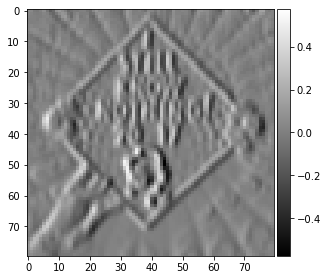

In [18]:
def find_data_for_images():
    img_size = 80
    
    count = 0
    j = 0
    temp=[]


    for i in images:
        try:
            image1 = imread("D:\FAST_NUCES\i212702_PAI_project\images\{}".format(i),as_gray=True)
            image_arr = resize(image1,(img_size,img_size))
            pre_hor = prewitt_h(image_arr)
            pre_ver = prewitt_v(image_arr)
            #canny algorithm
            can = feature.canny(image_arr)
            #fd, hog_image = hog(image_arr, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
            #
            pre_ver1=pre_ver.flatten()
            pre_hor1=pre_hor.flatten()
            #hog_image1=hog_image.flatten()
            ima = image_arr.flatten()
            can = can.flatten()
            #
            data_for_images_prewitt_v_features.append( [pre_ver1 , sentiments1[j]] )
            data_for_images_prewitt_h_features.append( [pre_hor1 , sentiments1[j]] )
            #data_for_images_hog_features.append( [hog_image1 , sentiments1[j]] )
            data_for_images.append( [ima , sentiments1[j]] )
            data_for_images_can_features.append([can , sentiments1[j]])
            #
            count+=1
            j+=1
            if(count==500):
                print(i)
                count=0
        except:
            temp.append(np.nan)
            print('NaN')

    
    imshow(pre_ver,cmap='gray')

    print(image1.shape)
    
find_data_for_images()

In [19]:
##data_for_images_can_features

In [20]:
image1 = imread("D:\FAST_NUCES\i212702_PAI_project\images\image_1.jpg",as_gray=True)



# Can Features

In [21]:
new_df_images=pd.DataFrame(data_for_images)
new_df_images.set_axis(['Image_features', 'Sentiment'], axis='columns', inplace=True)
new_df_images

,Image_features,Sentiment
0,"[0.4127489541617922, 0.41215343498791973, 0.41...",1
1,"[1.0, 1.0, 0.9999997830876033, 0.9995545172541...",1
2,"[0.1567267961342103, 0.16084471632397326, 0.16...",1
3,"[0.4247711287014589, 0.4287197468090136, 0.440...",1
4,"[0.9352078283416008, 0.9345986553752532, 0.933...",0
...,...,...
10212,"[0.9170408796869234, 0.8882563574821575, 0.873...",-1
10213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1
10214,"[0.9718546003474076, 0.9720087856514532, 0.972...",-1
10215,"[0.9964356365266952, 0.9973811427200141, 0.996...",-1


In [22]:
new_df_images1=pd.DataFrame(data_for_images_can_features)
new_df_images1.set_axis(['Image_features', 'Sentiment'], axis='columns', inplace=True)
new_df_images1=new_df_images1*1
new_df_images1

,Image_features,Sentiment
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
...,...,...
10212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
10213,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
10214,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
10215,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1


In [23]:
#new_df_images=new_df_images.append(new_df_images1, ignore_index=True)
new_df_images

,Image_features,Sentiment
0,"[0.4127489541617922, 0.41215343498791973, 0.41...",1
1,"[1.0, 1.0, 0.9999997830876033, 0.9995545172541...",1
2,"[0.1567267961342103, 0.16084471632397326, 0.16...",1
3,"[0.4247711287014589, 0.4287197468090136, 0.440...",1
4,"[0.9352078283416008, 0.9345986553752532, 0.933...",0
...,...,...
10212,"[0.9170408796869234, 0.8882563574821575, 0.873...",-1
10213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1
10214,"[0.9718546003474076, 0.9720087856514532, 0.972...",-1
10215,"[0.9964356365266952, 0.9973811427200141, 0.996...",-1


In [88]:
pickle_out = open("data_for_images.pickle","wb")
pickle.dump(data_for_images,pickle_out)
pickle_out.close()

In [25]:
#X_data_for_images = new_df_images['Image_features']
#y_data_for_images = new_df_images['Sentiment']

In [26]:
#pickle_out = open("X_data_for_images.pickle","wb")
#pickle.dump(data_for_images,pickle_out)
#pickle_out.close()

In [27]:
#pickle_out = open("y_data_for_images.pickle","wb")
#pickle.dump(data_for_images,pickle_out)
#pickle_out.close()

In [28]:
new_df_images

,Image_features,Sentiment
0,"[0.4127489541617922, 0.41215343498791973, 0.41...",1
1,"[1.0, 1.0, 0.9999997830876033, 0.9995545172541...",1
2,"[0.1567267961342103, 0.16084471632397326, 0.16...",1
3,"[0.4247711287014589, 0.4287197468090136, 0.440...",1
4,"[0.9352078283416008, 0.9345986553752532, 0.933...",0
...,...,...
10212,"[0.9170408796869234, 0.8882563574821575, 0.873...",-1
10213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1
10214,"[0.9718546003474076, 0.9720087856514532, 0.972...",-1
10215,"[0.9964356365266952, 0.9973811427200141, 0.996...",-1


In [29]:
len(data_for_images)

10217

In [30]:
new_df_images=new_df_images.loc[new_df_images['Sentiment']==-1]
new_df_images1=new_df_images1.loc[new_df_images1['Sentiment']==-1]

new_df_images = new_df_images.append(new_df_images1, ignore_index=True)
new_df_images                            # data where label is -1

C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\2214632735.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_images = new_df_images.append(new_df_images1, ignore_index=True)


,Image_features,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1
1,"[0.9551612035755822, 0.9551612035755822, 0.955...",-1
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1
3,"[0.9999997991863461, 0.9998873639227867, 0.991...",-1
4,"[0.09256533055144205, 0.09515922564773177, 0.0...",-1
...,...,...
3685,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
3686,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
3687,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
3688,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1


In [31]:
X_data_for_images=[]
y_data_for_images=[]

for i in data_for_images:
    X_data_for_images.append(i[0])
    y_data_for_images.append(i[1])
    
#for i in data_for_images_can_features:
#    X_data_for_images.append(i[0])
#    y_data_for_images.append(i[1])

In [32]:
#X_data_for_images=[]
#y_data_for_images=[]

#for i in new_df_images['Image_features']:
#    X_data_for_images.append(i)
#for i in new_df_images['Sentiment']:
#    y_data_for_images.append(i)

In [33]:
df_X = pd.DataFrame(X_data_for_images)
#df_X=df_X*10
#df_X=df_X.round(2)
#df_X

In [34]:
np.unique(df_X.loc[0])

array([0.02891135, 0.04165302, 0.04195503, ..., 0.96297675, 0.96329806,
       0.96332497])

In [35]:
df_y = pd.DataFrame(y_data_for_images)
df_y

,0
0,1
1,1
2,1
3,1
4,0
...,...
10212,-1
10213,-1
10214,-1
10215,-1


In [36]:
XX=df_X
yy=df_y


# Splitting DATA

In [37]:
X_train, X_test, y_train, y_test =train_test_split(XX, yy, test_size=0.1, random_state=21)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (9195, 6400)
Shape of y_train =  (9195, 1)
Shape of X_test =  (1022, 6400)
Shape of y_test =  (1022, 1)


In [38]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
5764,0.857213,0.857213,0.857213,0.857213,0.857213,0.857213,0.857213,0.857213,0.857213,0.857213,...,0.990974,0.990190,0.990185,0.990229,0.990316,0.990725,0.990849,0.990811,0.988852,0.987529
966,0.994130,0.994255,0.994255,0.994130,0.994118,0.994118,0.994118,0.994118,0.994118,0.994118,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1856,0.223984,0.258293,0.333253,0.310362,0.159112,0.092632,0.091603,0.107281,0.122058,0.131300,...,0.998079,0.999990,1.000000,1.000000,0.999925,0.997247,0.826295,0.182748,0.057640,0.049804
8427,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.138801,0.140227,0.136712,0.115714,0.120693,0.148116,0.144531,0.136633,0.132763,0.132291
4893,0.957614,0.976537,0.977525,0.977527,0.977527,0.977527,0.977527,0.977527,0.977527,0.977527,...,0.978081,0.978081,0.978081,0.978081,0.978081,0.978081,0.978081,0.978081,0.977917,0.962194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,0.671063,0.453754,0.304626,0.299722,0.223284,0.476073,0.449901,0.219199,0.254728,0.480553,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
48,0.092565,0.095159,0.095759,0.097289,0.098446,0.098820,0.099482,0.103820,0.109815,0.113269,...,0.396195,0.389088,0.360079,0.262327,0.343263,0.351087,0.340735,0.316177,0.268435,0.285856
8964,0.191444,0.121373,0.108974,0.107436,0.101432,0.096182,0.092189,0.088962,0.085511,0.086910,...,0.759315,0.760099,0.661091,0.589975,0.487744,0.505794,0.461131,0.413140,0.293824,0.343566
5944,0.299740,0.294701,0.290027,0.287402,0.292488,0.301354,0.309249,0.311915,0.316721,0.325548,...,0.587498,0.376159,0.222175,0.208338,0.165154,0.153449,0.144241,0.133174,0.122132,0.112109


In [39]:
y_train

,0
5764,1
966,-1
1856,1
8427,0
4893,0
...,...
9336,-1
48,-1
8964,0
5944,1


# Decision Tree

In [40]:
from sklearn import tree
model_1 = tree.DecisionTreeClassifier(max_depth=20)
model_1 = model_1.fit(X_train, y_train)

In [41]:
pred_1=model_1.predict(X_test)
model_1.score(X_test,y_test)

0.7837573385518591

In [42]:
pred_1


array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_1)*100)  
print("Report : \n", classification_report(y_test, pred_1))
print("F1 Score : ",f1_score(y_test, pred_1, average='macro')*100)

Accuracy :  78.37573385518591
Report : 
               precision    recall  f1-score   support

          -1       0.79      0.91      0.84       200
           0       0.75      0.91      0.82       440
           1       0.85      0.57      0.68       382

    accuracy                           0.78      1022
   macro avg       0.80      0.80      0.78      1022
weighted avg       0.80      0.78      0.77      1022

F1 Score :  78.35757580082091


In [44]:
confusion_matrix(pred_1,y_test)

array([[182,  10,  39],
       [ 10, 401, 125],
       [  8,  29, 218]], dtype=int64)

# KNN 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model_2=KNeighborsClassifier(n_neighbors=8,weights='distance',algorithm='brute')
model_2.fit(X_train, y_train)

C:\Users\oaun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', n_neighbors=8, weights='distance')

In [46]:
pred_2=model_2.predict(X_test)
model_2.score(X_test,y_test)

0.773972602739726

In [47]:
pred_2

array([ 0,  1,  0, ...,  0, -1,  0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_2)*100)  
print("Report : \n", classification_report(y_test, pred_2))
print("F1 Score : ",f1_score(y_test, pred_2, average='macro')*100)

Accuracy :  77.3972602739726
Report : 
               precision    recall  f1-score   support

          -1       0.75      1.00      0.85       200
           0       0.74      0.94      0.83       440
           1       0.90      0.47      0.62       382

    accuracy                           0.77      1022
   macro avg       0.80      0.80      0.77      1022
weighted avg       0.80      0.77      0.75      1022

F1 Score :  76.63401866465377


In [49]:
confusion_matrix(pred_2,y_test)

array([[200,   8,  60],
       [  0, 412, 143],
       [  0,  20, 179]], dtype=int64)

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=12, random_state=21)
model_3.fit(X_train, y_train)

C:\Users\oaun\AppData\Local\Temp\ipykernel_9724\2013452851.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train, y_train)


RandomForestClassifier(n_estimators=12, random_state=21)

In [51]:
pred_3=model_3.predict(X_test)
model_3.score(X_test,y_test)

0.8317025440313112

In [52]:
pred_3

array([ 0,  1,  0, ...,  0, -1,  0], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_3)*100)  
print("Report : \n", classification_report(y_test, pred_3))
print("F1 Score : ",f1_score(y_test, pred_3, average='macro')*100)

Accuracy :  83.17025440313111
Report : 
               precision    recall  f1-score   support

          -1       0.94      0.98      0.96       200
           0       0.76      0.93      0.84       440
           1       0.88      0.64      0.74       382

    accuracy                           0.83      1022
   macro avg       0.86      0.85      0.85      1022
weighted avg       0.84      0.83      0.83      1022

F1 Score :  84.70769996313194


In [54]:
confusion_matrix(pred_3,y_test)

array([[197,   0,  12],
       [  0, 410, 127],
       [  3,  30, 243]], dtype=int64)

# Text DATA

In [55]:
text_data = bb[['text_corrected','overall_sentiment','sentiment']]
text_data

,text_corrected,overall_sentiment,sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1
1,The best of #10 YearChallenge! Completed in le...,very_positive,1
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,10 Year Challenge - Sweet Dee Edition,positive,1
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
...,...,...,...
10212,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,negative,-1
10213,NIGHTMARES Are made of this.,very_negative,-1
10214,Baby Mr. Bean Funny Picture,negative,-1
10215,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,negative,-1


In [56]:
text_data=text_data.dropna(axis=0)
text_data

,text_corrected,overall_sentiment,sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1
1,The best of #10 YearChallenge! Completed in le...,very_positive,1
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,10 Year Challenge - Sweet Dee Edition,positive,1
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
...,...,...,...
10212,THAT FACE YOUR FRIEND GIVES YOU WHEN YOUR CRUS...,negative,-1
10213,NIGHTMARES Are made of this.,very_negative,-1
10214,Baby Mr. Bean Funny Picture,negative,-1
10215,YOUR FACE MemeCenter.com WHEN THERES A SUBSTIT...,negative,-1


# splitting Data

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [58]:
def remove_punctuation(word):
  punctuation = '''!‘’()%\n٪-;۔،:\n\/'$^*|"\,“./؟_ء@#?'''
  for element in word:  
    if element in punctuation:
      word = word.replace(element, '') 
  return word.lower()

In [59]:
texxt_data = text_data.text_corrected
new_text_data=[]
for sentence in texxt_data:
    temp=""
    for word in sentence:
        word=remove_punctuation(word)
        temp=temp+word
    new_text_data.append(temp)
    print(temp)

look there my friend lightyear now all sohalikut trend play the 10 years challenge at facebook imgflipcom
the best of 10 yearchallenge completed in less the 4 years kudus to narendramodi ji 805 pm  16 jan 2019 from mumbai  india
sam thorne strippin  follow follow saw everyone posting these 2009 vs 2019 pics so heres mine 623 pm  12 jan 2019 o 636 retweets 3 224 likes 65 636 32k
10 year challenge  sweet dee edition
10 year challenge with no filter 47 hilarious 10 year challenge memes  what is 10 year challenge
1998 dont get in car with strangers 2008 dont meet people from the internet alone memecentercom 2019 uber order yourself a stranger from the internet to get into a car with alone
10 years challenge is lit af üs & b erg 1945 1955 wow such transformation
10 year challenge emotional edition boredpandacom
fornite died in 10 months but minecraft never died in 10 years i am so proud of this community
facebook 10 year challenge a ploy or a simple meme mo by exo hạ minh le 18 jan 2018
pro

can you see the angry bunny face
accidentally bought an australian cat 
invisible positive pregnancy test
your tears give us strength
this is my opinion of ur opinion
please think of the kittens
good morning i like the sound you make no such thing when you shut up
wwwcleanmemescom you threw away the bird i gave you that was a present
this cat looks like it just got knocked out in an anime cabbagecatmemes
i must continue my quest to slay the red dot
invisible samurai sword
isurrender to cuddles
hey i just met you
directions for making lasagna step 1 remove cat from dish
my kitten keeps bringing us leaves she caught in the garden as presents today she was especially proud of this very big one
when ur havin a hard time but ur best friend is there for u bokuwachikuwa tumblr
chill dude 1only took one cookieokk
im thirsty but i dont like the water in my bowl
i found a cat hair on your shirt this morning it was black
anyone know what type of bird bring your cat to work day
what an interesting

ive had top scientists study it and there was room for you on that door  jack imgflipcom
they dont like me
dear girls  before you call a guy ugly you should remember he does not wear makeup
and the oscar goes to
happy birthday man have a great one memegeneratornet
i want you more than leonardo dicaprio wants an oscar too soon quickmemecom
the acadamy has given leo an oscar leo is free
sooner or later your gonna have to give me one bam
so the academy will never give me an oscar but the real question is 2 do i give a fuck 21 absolutely fucking not 
when you cant even get a lego oscar
oh you thought i was listening may i offer you white cake imgflipcom
dicaprio meme sorry  the markets been flooded imgripcom
cheers to my haters there is so much more to come memegeneratornet
rt leoactivity leonardo dicaprio and kate moss on their way to an art show in new york city 1993 httpstcosbbalog2qq
jeremy kaplowitz  july 11  2017 hard drive climate scientists warn that all super mario levels will be 

if directv cancels history channel aliens will not be happy hd hd historycom
bread goes in toast comes out aliens h historycom quickmemecom
historycom aliens aliens my roommates first attempt at replicating giorgio a tsoukaloss famous aliens meme
seal fact  85 aliens constructed the pyramids get all ty applecom do i need to say more aliens giorgio a tsoukalos hd historycom
so gorgio  what do you think how the pyramids were built aliens
egyptians built the pyramids april fools it was aliens historycom
virtually unbreakable you cant explain that aliens comix edcom momestachecom
bro do you even science do you even alien
tide goes in  tide goes out aliens h hd historycom memegenratornet
you believe in aliens cheers historycom imgflipcom
how does your headphones cord get tangled in your pocket aliens hhd historycom eige sceool memes
the difference between style and fashion is quality georgio armani wwwsizechartercom
every other countrys playing pokemon go on na and im just sitting here mast

tell me do you bleed well  i know your robin sure did
memedroid when you find all the special weapons in a rpg
you know the only natural remedy to being a bitch  is gamer cum so open wide hahahahahahahahaha imgflipcom
its not that im antisocial im just not user friendly trendingnutscom
good news people im no longer a danger to society imgflipcom
this could be us
what happened  mike youryour balls drop off quikememecom
i dont always drink but when i do  i beat harley quinn senseless
say youre a veteran who opposes the war and the current president and nobody bats an eye say youre a veteran who hates troop worship and nationalism and everyone loses their minds quickmemecom
this could be us veronica  but you chose to backstab a nice gentleman gamer and date a rude chad
michael jackson becomes a white person and no one bats an eye rachel dolezal becomes black  and everyone lsoes thier minds tornet
when realize that episode 15 of ditf is 2 days away imgflipcom
why the fuck does the joker me

and god promised men that good and obedient wives would be found in all corners of the world then he made the earth roundand laughed and laughed and laughed memecentercom memecenter
0000 that was misogyny  wasnt it icanhasacheezburgercom
chuck norris catches all the pokemon occorre from a landline
yup  still fabulous thefreshpickle
the face you make when theyre chanting usa and you cant join in because you dont know how to spell it
pluck your eyebrows out draw them back on woman logic the above statement is an oxymoron memebasecom
the republicans dedicated to making government just small enough to fit into your vagina poutica
a vote for anyone in the gop is a vote for misogyny  racism & corruption
then i said internalised homophobia and misogyny memegeneratornet
her only crime shes a female running for president they counted on misogyny
its trumps fault that i cant get a job because hes a racist misogynistic bigot
supporting real women in games because were misogynists  right support t

two racist characters we all used to watch without getting our panties in bunch
everybody hates a racist but a racist only hates a few people solid logic
2016 if you criticize the president youre racist 2017 i hate the president and anyone who disagrees with me is a racist
how many girls do you see if you said 5  youre racist
why hillary lost exhibit 537 even white people are sick of other white peoples racist bullshit elman dixon diaz selfhating white people who promote hatred of white people
its only racist if youre white
great game now gtfo my property
black girls be kinemaster like im mixed with what gorilla and rhino
tell me this slice of toast doesnt look like a black girl with her hair in a bun
im not a racist racism is crime and crime is something for black people
shaggy this isnt weed
i am king nigger bring me to your chicken memecentercom memetenter
white colored racism white safe space for colored social justice starecatcom
okay can we stop with the both parties are the same

gerd artificial intelligence once we have figured out how to build artificial minds with the average human iq of 100  before long we willll build machines with iqs f 500 and 5 000 david gelernter nyt
yes i love technology quickmemecom
when you see the first question on your final and already know youre going to fail
sorry i annoyed you with my request for the files i need to finish your project
back in my day  the future of education was radio quickmemecom
can you please make more than one good movie dc we dont do that here
baby boomers dont forget my senior discount who our kids think we are who brands think we are who aarp thinks we are who pharma thinks we are who we think we are who we really are
tracking my cookies you will never get my recipe internet
dont worry  im from tech support memecentercom memetentera
with this technology we will bring the united states to its knees watch out usa its a floppy disk with 144mb of destruction
emails what emails i never sent any emails none n

your face when someone reads your message but doesnt reply alrighty then fbwallpicscom
i want to feed her panda some bamboo if you know what i mean
you watch the xmen why not watch the a+ men
4g 64 0006 0000 maxandharveyfangirl1 what i thinkt look like when i smile at someone whati actually  look like
walk up in the thrift shop like imgflipcom hey i need my sock third world success kid meme  imgflip
the red queen sexy mad hatter98 replying to sanshodelaine and mort3mer i busted out laughing at this i wonder if he had whiplash after turning his head so quickly
ah youre exquisite  you must let me paint you  barney stinson
when u cant afford quality name brand memes so u have to settle for peep the toad
but im not racist
how could any women spend 8 hours a day with this face and not fall in love with it well for starters  at one point that face starts talking
when you have to teach the kids that family means nothing in uno the nerddad
its not cheating if theyre both your girlfriends memew

this page is ultra gayyyyyyyyyy quickmemecom ultra gay seal memes  quickmeme
when your mom finds out that you are reading mein kampf and throws it away the sacred texts
obama meeting with putin susan rice and a russian attorney at g20 mike rilling where was the media outrage then 
this portrait is not of the worst president ever this is not even of the worst president of this century imgflipcom
girls keep being meme to me
for just 50 cents you could save a childs life via 9gagcom best i candois 25 cents emirates res carlsberg barclays bbc sport bb ssport 90s barclays besticando is 49 cents hsberg
racism is never okay fuck white people starecatcom
huh so babies cant swim
im funny  right
hey macarena text memes com
bloggend bewegen bloggendbewegen follow this dude made a fool of himself with a weak attempt to use a beautiful woman in a sexist meme guess what  she not that into him either twitter
married to a pedophile married to a rapist calls trump a misogynist
only black guy on breakin

not a cell phone in sight just living in the moment absolutely beautiful wish we could go back
rowan scottpilgrimm follow im obsessed with these memes indie alternative wlwa ppl who are afraid of growing up lorde ppl who hate their a hometown indie alternative mlm alady 211 pm  15 aug 2018
the angel gabriel appeared before mary and he said made with fumatic purge the xenos
whats your moms name aquamartha welcome to the justice league meme friday best of 2018
this is bill bill has a girlfriend bill doesnt post 56 photos a day with his girlfriend bill likes to keep these things private  because thats how they should bebill is smartbe like bill
this is bill wwwnishantdasnet bill loves to comment on every sneeze of peacefuls bill avoids commenting on pathankot & runs away when asked about malda bill is smart be like bill
the best thing about dating a bills fan is that you know she aint looking for a ring
look at this photo and play goodbye horses by the garvey remixesdo it
the peoplescubec

ginger seal craves sustenance no sole to be found
on my way to work i cuta guy off and give him the finger
interviewer asked navy seal if they have to learn foreign languages like green berets no maam when they send us over there its not to talk imgflipcom
wants to call someone gay chooses seal meme quickmemecom
do you want to get it banned  like the puffin because thats how you  get it banned  like the puffin
cutting wrapping paper scissors start to glide unbelievable & ludicrus christmas seal
when you go and check the fridge and theres no food left
frogman nice nickname quickmemecom
choice hat bro imgflipcom
i was top of my class at navy seal training at navy seal training imgflipcom
oh human you so funnyi memecentercom mamecenter
have dream where i kill some dude and haphazardly get rid of the body mgom wake up and realise im not a murderer imgflipcom scumbag brain and satisfied seal make strange bedfellows
ex al me making sorry eyes my mum sarcastically with insulting a lady who is

tvquotes eu amy farrah fowler  will you share this toothbrush holder with me i would love to did we really need to be here for this call me crazy  but i found it moving
lets just assume that everything you have done up until now is wrong quickmemecom
nerd conversation party of three memegeneratornet
people say you cant live without love i think oxygen is more important funny quotes on kul fotocom
steven hawking is a genius and talks like a robot thats all i ever wanted in a friend
oh look  penny
claims to be nerdy norton 3 uses norton security we know memes
sheldon bazinga big bang theory studio audience shit negro thats all you had to say பற பற பற penny பற பற பற penny  penny
you called the police because someone hacked your world of warcraft account what choice did i have
one cries because one is sad for example  i cries because others are stupid  and that make me sad by  stuffistumbleduponcom
when youre halfway through a book and come to a plot twist at 1 am i dont need sleep i need 

i dont often ban memes but when i do  putin memes pop up everywhere
whose funeral is this havent decided yet
just putin on my glasses
vladimir putin not known for giving a fuck
go to bed no whatch u say sorry sorry look im sleeping snore  snore
brace yourselves memecentercom dicaprio oscar memes are coming
what will you have for thanksgiving dinner turkey twitter
shows up at diplomatic event everyone hoped he was dead
da  is cute now i break you quickmemecom
trump i dont know putin putin isnt my best friend putin putin lowkey crying right now
hey ukraine crimea river
not ukraine mykraine memegenerator119
german chancellor  angela merkel has a known fear of dogs well guess who vladimir putin brings with him every time she visit him
well done paul your family shall live memegeneratornet
good job brilliant putin memescom
facing backwards in an elevator
one does not simply ban gay clown putin memes
vladamir putin fucks sharks and then doesnt call
putin has a slogan too make russia great ag

5 peoples  1 things in common farcethemusiccom
sad & useless humor sadanduseless worlds worst hair 2019 draws to a thrilling climax as finalists meet 944 am  27 feb 2019
wtf is this shit weknow memes
how i roll out of bed in the morning
chosen1s youre a great wizard  you really are not as good as you i said wizard not witch
america has militarybases allover the world humanity first andits me whois the aggressor vladimir putin ~ tina
this moment instagram jokerlovers when someone says he doesnt like the joker crazy ones like joker universe
bigboned we love what our fans are doing with the dr evil meme gym memes
cousin eddie every family has one
please dont motivate me by saying just do it you have no idea what i may be thinking at that moment essentialoilstylecom
you dont own a tv whats all of your furniture pointed at
grew up with steve jobs who didnt have time for charity mex 519
deaneggsandsam when u sneeze in front of your pet and they look like youve just offended their great ances

must watch movies of 2017 iti chennai memes maanagaram a handful of diverse characters find themselves in extraordinary situations that are interlinked with one another
1998 dont get in car with strangers 2008 dont meet people from the internet alone memecentercom 2019 uber order yourself a stranger from the internet to get into a car with alone
10 years challenge is lit af üs & b erg 1945 1955 wow such transformation
probably the first man to do 10 year challenge chennai pasanga da
antivaxx kids when they see someone doing the 10 year challenge
hawkeye is important in infinity war is he though
potato chips tortilla chips marvel captain america civil war imgflipcom
you mean to tell me spoons dont actually sound like airplanes
im triggered quickmemecom
if i cant do this at ur baby shower dont even ask me to be ur childs god father the heck lmao funny petty savage bruh nochillzone nochill babyshower godfather memes niggasbelike dudesbelike belike followme followforfollow follow4follow
wh

kids have so much energy because they siphon it out of their parents like little gasoline thieves
this is bill bill has a girlfriend bill doesnt post 56 photos a day with his girlfriend bill likes to keep these things private  because thats how they should bebill is smartbe like bill
the best thing about dating a bills fan is that you know she aint looking for a ring
bill is on the internet bill sees something that offends him bill moves on bill is smart be like bill
igot a new toy funnycat memesxyz i will play with it exactly one day then i want a new one
why ami better than grumpy cat grumpy cat has feelings
chuck norris fact of the day chuck norris once ate a rubix cube and shit it out solved
when someone um no do u want to lose fingers pricelesscraver touches your hair
its so quiet at hillarys hq right now liberty memes you can hear an email being deleted
sings country music wearing shirt that gets own countrys flag wrong quickmemecom
look marge im from the black country
russians p

the real reason gene wilder wanted a black charlie to be casted i want a chocolate boy to run my chocolate factor the chocolate factory
hurry up i really have to go the internet scavengers  pmslwebcom
thats a great story can i eat it
ill start a fight when you defend yourself  ill call the cops imgflipcom
calling issues like domestic violence that affect women disproportionately womens issues is sexist quickmemecom
if feminists did actual gymnastics like mental gymnastics no you make me sandwich  they wouldnt need feminism imgflipcom
when you see random floating text above you boys boys think about martha and realize youre trapped in a meme
when you go down on your girl next time enjoy the smell of my balls memegen memegeneratornet
obama check plbiden actually  well take five more milkshakes and you can bill the white house on january 21st
life is pretty simple sometimes all you need is a couple of drops of frankincense to make everything better and sometimes all you need is a couple o

In [60]:
X = pd.Series(new_text_data)
y = text_data.sentiment

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1) # 70% training and 30% test
print('Shape of X_train = ', X_train1.shape)
print('Shape of y_train = ', y_train1.shape)
print('Shape of X_test = ', X_test1.shape)
print('Shape of y_test = ', y_test1.shape)

Shape of X_train =  (9195,)
Shape of y_train =  (9195,)
Shape of X_test =  (1022,)
Shape of y_test =  (1022,)


In [61]:
type(X)

pandas.core.series.Series

In [62]:
X

0        look there my friend lightyear now all sohalik...
1        the best of 10 yearchallenge completed in less...
2        sam thorne strippin  follow follow saw everyon...
3                     10 year challenge  sweet dee edition
4        10 year challenge with no filter 47 hilarious ...
                               ...                        
10212    that face your friend gives you when your crus...
10213                          nightmares are made of this
10214                           baby mr bean funny picture
10215    your face memecentercom when theres a substitu...
10216                            i still know nothing 2017
Length: 10217, dtype: object

In [63]:
vectorizer = CountVectorizer(ngram_range = (1, 5), stop_words='english',decode_error='ignore')
X_trainn = vectorizer.fit_transform(X_train1)
X_testt = vectorizer.transform(X_test1)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_1 = TfidfVectorizer(ngram_range=(2,5))
X_trainn_1 = vectorizer_1.fit_transform(X_train1)
X_testt_1 = vectorizer_1.transform(X_test1)

In [65]:
print('Shape of X_train = ', X_trainn.shape)
print('Shape of X_testt = ', X_testt.shape)

Shape of X_train =  (9195, 146908)
Shape of X_testt =  (1022, 146908)


# SVC

In [66]:
from sklearn.svm import SVC
from sklearn import svm
model_4 = svm.SVC(kernel='linear', C = 5.0)
model_4.fit(X_trainn, y_train1)

SVC(C=5.0, kernel='linear')

In [67]:
pred_4= model_4.predict(X_testt)
pred_4

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_4)*100)  
print("Report : \n", classification_report(y_test1, pred_4))
print("F1 Score : ",f1_score(y_test1, pred_4, average='macro')*100)

Accuracy :  82.38747553816047
Report : 
               precision    recall  f1-score   support

          -1       0.83      1.00      0.90       180
           0       0.78      0.93      0.85       431
           1       0.90      0.64      0.75       411

    accuracy                           0.82      1022
   macro avg       0.84      0.86      0.83      1022
weighted avg       0.84      0.82      0.82      1022

F1 Score :  83.2806328874239


In [69]:
confusion_matrix(pred_4,y_test1)

array([[180,   2,  36],
       [  0, 400, 113],
       [  0,  29, 262]], dtype=int64)

# SGDClassifier


In [70]:
from sklearn.linear_model import SGDClassifier
model_5 = SGDClassifier()
model_5.fit(X_trainn, y_train1)

SGDClassifier()

In [71]:
pred_5= model_5.predict(X_testt)
pred_5

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_5)*100)  
print("Report : \n", classification_report(y_test1, pred_5))
print("F1 Score : ",f1_score(y_test1, pred_5, average='macro')*100)

Accuracy :  85.81213307240705
Report : 
               precision    recall  f1-score   support

          -1       0.94      1.00      0.97       180
           0       0.80      0.93      0.86       431
           1       0.91      0.72      0.80       411

    accuracy                           0.86      1022
   macro avg       0.88      0.88      0.88      1022
weighted avg       0.87      0.86      0.86      1022

F1 Score :  87.63266427894787


In [73]:
confusion_matrix(pred_5,y_test1)

array([[180,   0,  12],
       [  0, 400, 102],
       [  0,  31, 297]], dtype=int64)

# MultinomialNB

In [74]:
from sklearn.naive_bayes import MultinomialNB
model_6 = MultinomialNB()
model_6.fit(X_trainn, y_train1)

MultinomialNB()

In [75]:
pred_6= model_6.predict(X_testt)
pred_6

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_6)*100)  
print("Report : \n", classification_report(y_test1, pred_6))
print("F1 Score : ",f1_score(y_test1, pred_6, average='macro')*100)

Accuracy :  76.71232876712328
Report : 
               precision    recall  f1-score   support

          -1       0.93      0.98      0.95       180
           0       0.67      0.94      0.79       431
           1       0.88      0.49      0.63       411

    accuracy                           0.77      1022
   macro avg       0.83      0.80      0.79      1022
weighted avg       0.80      0.77      0.75      1022

F1 Score :  78.93003859759179


In [77]:
confusion_matrix(pred_6,y_test1)

array([[176,   0,  14],
       [  2, 406, 195],
       [  2,  25, 202]], dtype=int64)

# Final voting

In [78]:
from sklearn.ensemble import VotingClassifier

Pred = pd.DataFrame()
Pred['pred_1']=pred_1
Pred['pred_2']=pred_2
Pred['pred_3']=pred_3
Pred['pred_4']=pred_4
Pred['pred_5']=pred_5
Pred['pred_6']=pred_6

#print(Pred)
#print(y_test)

#final_model_1 = VotingClassifier(estimators=[('tree', model_1), ('knn', model_2), ('forest', model_3)], voting='hard')
#final_model_1.fit(X_train, y_train)


In [79]:
#Pred.head(50)

In [80]:
Pred=Pred.replace(0,2)      # 0 = 2
Pred=Pred.replace(-1,3)      # -1 = 3
#Pred.head(50)

In [81]:
pred_final=Pred.mode(axis=1)

In [82]:
#pred_final.head(50)

In [83]:
#Pred['Final_pred_1'] = Pred.mode(axis=1, numeric_only=False, dropna=True)

In [84]:
pred_final=pred_final.dropna(axis=1)
pred_final=pred_final.fillna(3)  # where possibilities are equal, then using 1 as the option 
pred_final=pred_final.replace(2,0)
pred_final=pred_final.replace(3,-1)
#pred_final

In [85]:
pred_final.value_counts()

 0.0    598
 1.0    295
-1.0    129
dtype: int64

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test1,pred_final)*100)  
print("Report : \n", classification_report(y_test1, pred_final))
print("F1 Score : ",f1_score(y_test1, pred_final, average='macro')*100)

Accuracy :  67.31898238747553
Report : 
               precision    recall  f1-score   support

          -1       0.67      0.48      0.56       180
           0       0.63      0.87      0.73       431
           1       0.77      0.55      0.64       411

    accuracy                           0.67      1022
   macro avg       0.69      0.63      0.64      1022
weighted avg       0.69      0.67      0.66      1022

F1 Score :  64.28522560176796


In [87]:
confusion_matrix(pred_final,y_test1)

array([[ 86,   5,  38],
       [ 77, 375, 146],
       [ 17,  51, 227]], dtype=int64)

In [108]:
import os
from flask import Flask, request

UPLOAD_FOLDER = './upload'

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'file1' not in request.files:
            return 'there is no file1 in form!'
        file1 = request.files['file1']
        path = os.path.join(app.config['UPLOAD_FOLDER'], file1.filename)
        file1.save(path)
        return path

        return 'ok'
    return '''
    <h1>Upload new File</h1>
    <form method="post" enctype="multipart/form-data">
      <input type="file" name="file1">
      <input type="submit">
    </form>
    '''

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2022 04:12:28] "GET / HTTP/1.1" 200 -
